Importing necessary packages

In [1]:
from fastai import *
from fastai.vision import *

  Loading data

In [2]:
path = untar_data(URLs.MNIST)

  Checking paths in data

In [3]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_png/testing'),
 PosixPath('/root/.fastai/data/mnist_png/training')]

  Storing testing and training paths

In [4]:
path_test = path/'testing'
path_train = path/'training'

  Checking test path

In [5]:
path_test.ls()

[PosixPath('/root/.fastai/data/mnist_png/testing/9'),
 PosixPath('/root/.fastai/data/mnist_png/testing/3'),
 PosixPath('/root/.fastai/data/mnist_png/testing/0'),
 PosixPath('/root/.fastai/data/mnist_png/testing/1'),
 PosixPath('/root/.fastai/data/mnist_png/testing/6'),
 PosixPath('/root/.fastai/data/mnist_png/testing/2'),
 PosixPath('/root/.fastai/data/mnist_png/testing/5'),
 PosixPath('/root/.fastai/data/mnist_png/testing/4'),
 PosixPath('/root/.fastai/data/mnist_png/testing/8'),
 PosixPath('/root/.fastai/data/mnist_png/testing/7')]

  Checking train path

In [6]:
path_train.ls()

[PosixPath('/root/.fastai/data/mnist_png/training/9'),
 PosixPath('/root/.fastai/data/mnist_png/training/3'),
 PosixPath('/root/.fastai/data/mnist_png/training/0'),
 PosixPath('/root/.fastai/data/mnist_png/training/1'),
 PosixPath('/root/.fastai/data/mnist_png/training/6'),
 PosixPath('/root/.fastai/data/mnist_png/training/2'),
 PosixPath('/root/.fastai/data/mnist_png/training/5'),
 PosixPath('/root/.fastai/data/mnist_png/training/4'),
 PosixPath('/root/.fastai/data/mnist_png/training/8'),
 PosixPath('/root/.fastai/data/mnist_png/training/7')]

  Extracting folders from path

In [7]:
data = ImageDataBunch.from_folder(path=path,train='training',valid='testing',size=224,ds_tfms=get_transforms(),bs=64).normalize(mnist_stats)

  Viewing data

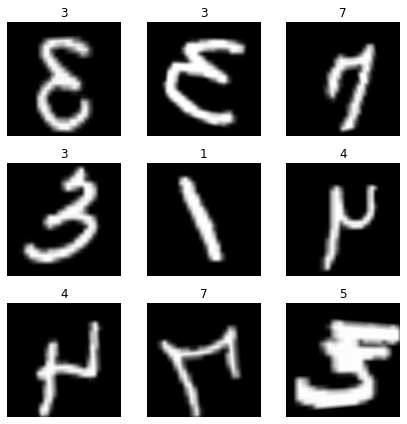

In [8]:
data.show_batch(rows=3, figsize=(6,6))

In [9]:
print(data.classes)
len(data.classes),data.c

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


(10, 10)

  A model with pretrained model architecture ResNet34

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [11]:

learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

  Fitting model

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.242441,0.122004,0.958500,07:19
1,0.117929,0.058757,0.980200,07:32
2,0.079463,0.044331,0.984600,07:38
3,0.075411,0.039533,0.985800,07:42


  Saving the weights of the model

In [13]:
learn.save('stage-1')

  Interpretation

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

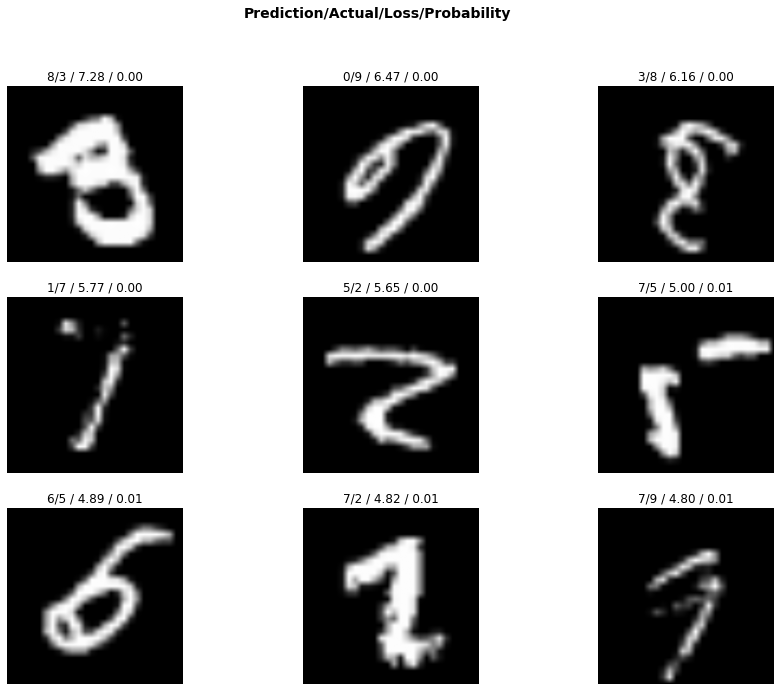

In [15]:

interp.plot_top_losses(9, figsize=(15,11))

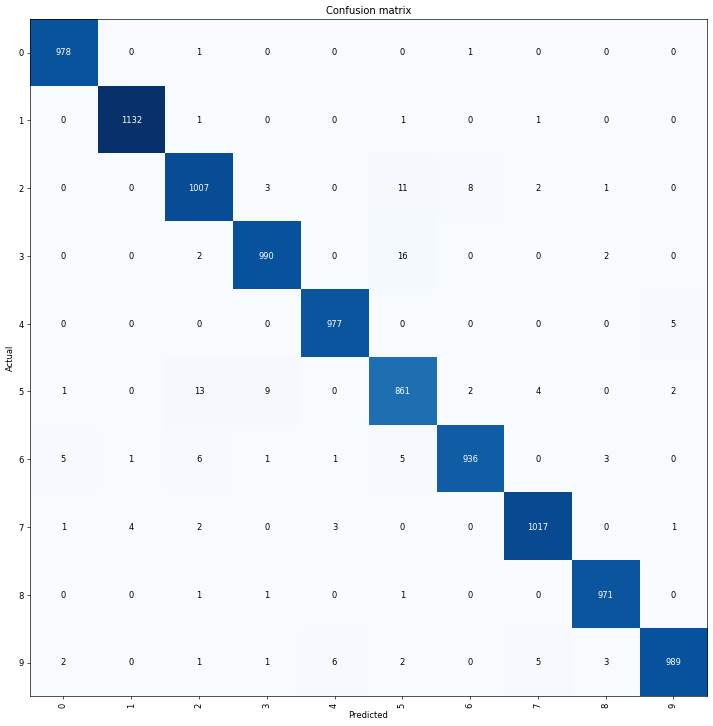

In [16]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [17]:
interp.most_confused(min_val=2)

[('3', '5', 16),
 ('5', '2', 13),
 ('2', '5', 11),
 ('5', '3', 9),
 ('2', '6', 8),
 ('6', '2', 6),
 ('9', '4', 6),
 ('4', '9', 5),
 ('6', '0', 5),
 ('6', '5', 5),
 ('9', '7', 5),
 ('5', '7', 4),
 ('7', '1', 4),
 ('2', '3', 3),
 ('6', '8', 3),
 ('7', '4', 3),
 ('9', '8', 3),
 ('2', '7', 2),
 ('3', '2', 2),
 ('3', '8', 2),
 ('5', '6', 2),
 ('5', '9', 2),
 ('7', '2', 2),
 ('9', '0', 2),
 ('9', '5', 2)]

  Unfreezing the weights

In [18]:
learn.unfreeze()

In [19]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.053612,0.028129,0.991100,08:11


  Accuracy increased.

In [20]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
9,9,9,9,9
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
9,9,9,9,9
Path: /root/.fastai/data/mnist_png;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [21]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


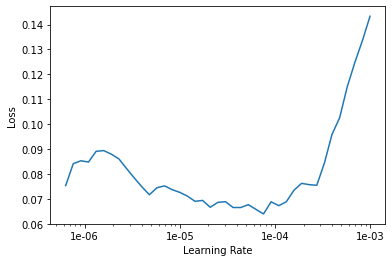

In [22]:
learn.recorder.plot()

In [23]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.116194,0.064594,0.978800,08:16
1,0.039906,0.022430,0.993100,07:57


  Accuracy still increased

In [24]:
 accuracy(*learn.get_preds())

tensor(0.9931)